# ABOUT THE DATASET

### The aim of this project is to apply algorithms to find the most accurate prediction for monthly Australian beer production for the years 1996-2000. Although the database provided covers decades (1956-1995), it contains only two columns: Time frame and beer production. Intuition tells us that there are several factors that can influence beer production in a particular country, including temperature, price, advertising, but also national and international economic and political factors such as: shortage of ingredients for beer, inflation or the government's intention to reduce per capita alcohol consumption.

### Under a logical assumption, we believe that all these factors could be taken into account and would create models with a much higher predictability.

### The unit of monthly beer production taken here is in megaliters.

# Approach:

## Time Series Forecasting

### Time series forecasting is a specialized area of predictive analytics that focuses on predicting future data points in a time-ordered sequence. In time series data, observations are recorded at regular intervals over time, and the goal is to use historical data to make informed predictions about future values in the sequence. This approach is critical in various fields, including finance, economics, meteorology, and more, where understanding and predicting trends and patterns over time are essential for decision-making.

### Time series data often exhibits distinct components, such as trends, seasonality, and random noise. Trends represent long-term movements in the data, while seasonality involves regular, repeating patterns linked to specific time intervals (e.g., daily, weekly, or annually). Forecasting methods take these components into account to provide accurate predictions.

### The methods for time series forecasting vary in complexity, from simple techniques like moving averages and exponential smoothing to more advanced models like ARIMA and machine learning algorithms. These methods use historical data to make predictions about future values. The accuracy of these forecasts can be assessed using various metrics, including Mean Absolute Error (MAE) and Mean Squared Error (MSE).

### Time series forecasting is crucial for making decisions based on historical data trends and patterns. It plays a pivotal role in applications such as stock price predictions, GDP forecasts, weather predictions, inventory management, and energy production. As data collection and analysis techniques advance, including the use of machine learning and deep learning, the accuracy of time series forecasting continues to improve, enabling better-informed decisions across various industries.

In [1]:
# Importing the necessary packages

import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
sns.set_style('whitegrid')

In [2]:
# Loading the data

df = pd.read_csv('Beer Australia.csv')

In [3]:
# Checking the head of the dataframe

df.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [4]:
# Checking the Data types of the data

df.dtypes

Month                       object
Monthly beer production    float64
dtype: object

In [5]:
# Converting the datatype of Month from object to time stamp.

df['Month'] = pd.to_datetime(df['Month'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    476 non-null    datetime64[ns]
 1   Monthly beer production  476 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.6 KB


Hence it shows that there are no null values

In [7]:
# Checking if all data values are unique

df['Month'].nunique()

476

In [8]:
# To apply a time series model the date stamps has to be the index of the data frame:

df.set_index('Month', inplace=True)

In [9]:
df.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


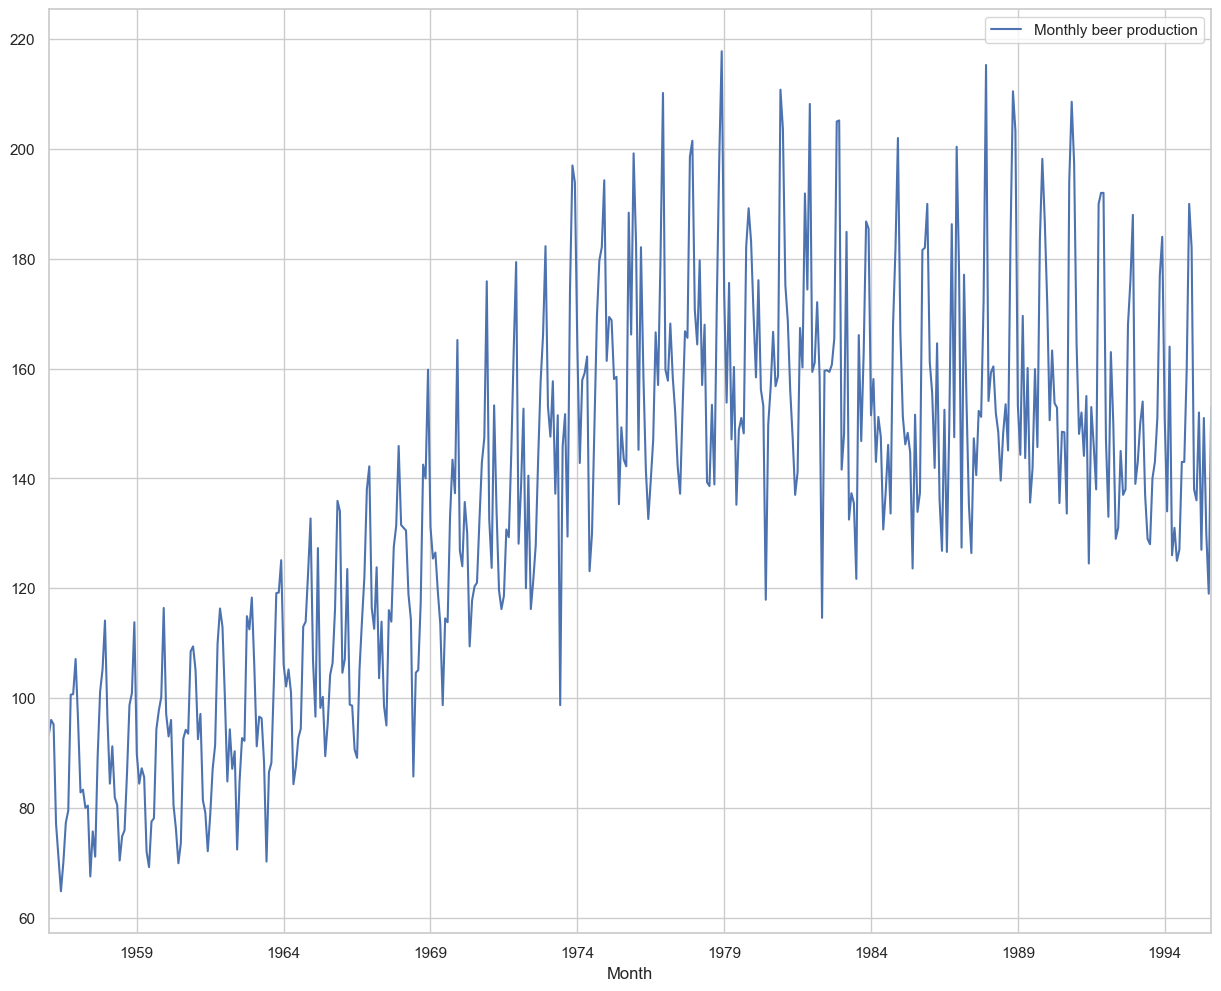

In [9]:
# Visualising how the monthly beer production has varied since years:

from pylab import rcParams
rcParams['figure.figsize'] = 15,12
df.plot()
plt.show()

There seems to be a clear trend and a strong seasonality at the end of each year.

Seasonal Decomposition

Seasonal decomposition, as implemented in methods like `seasonal_decompose` in time series analysis, is a process used to decompose a time series into its fundamental components: trend, seasonality, and residual (or noise). These components provide valuable insights into the underlying patterns and variations within the data. The decomposition process helps analysts better understand and model time series data, which is often critical for forecasting and decision-making. 

The key difference between additive and multiplicative seasonal decomposition lies in how the seasonality component is modeled. In an additive decomposition, seasonality is treated as a fixed, constant pattern, where the seasonal fluctuations are added to the level of the time series. In contrast, in a multiplicative decomposition, seasonality is treated as a proportional, relative pattern, meaning the seasonal fluctuations are multiplied by the level of the time series. Additive decomposition is suitable when the magnitude of seasonal fluctuations remains relatively constant over time, while the multiplicative approach is more appropriate when the magnitude of seasonality changes with the level of the data. The choice between additive and multiplicative decomposition depends on the specific characteristics of the time series data being analyzed.

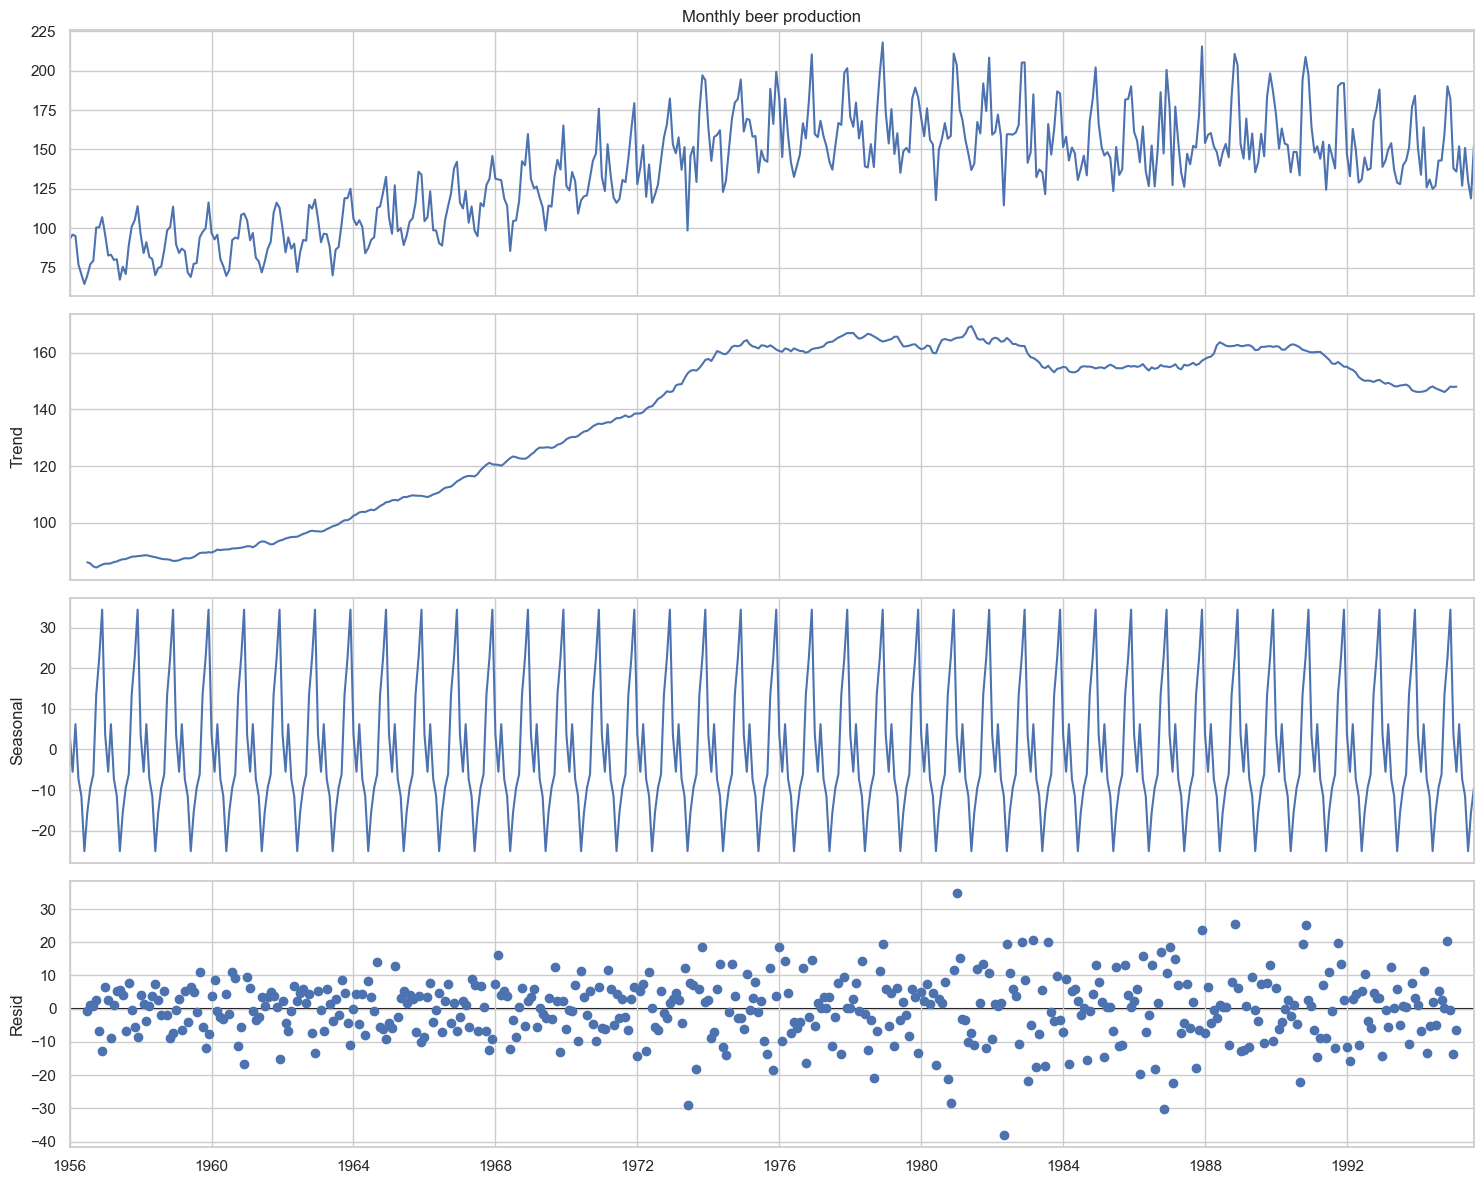

In [10]:
# Decomposing the time series data by using additive method:

from statsmodels.tsa.seasonal import seasonal_decompose
decompose_additive = seasonal_decompose(df['Monthly beer production'], model='additive',period=12)
decompose_additive.plot()
plt.show()

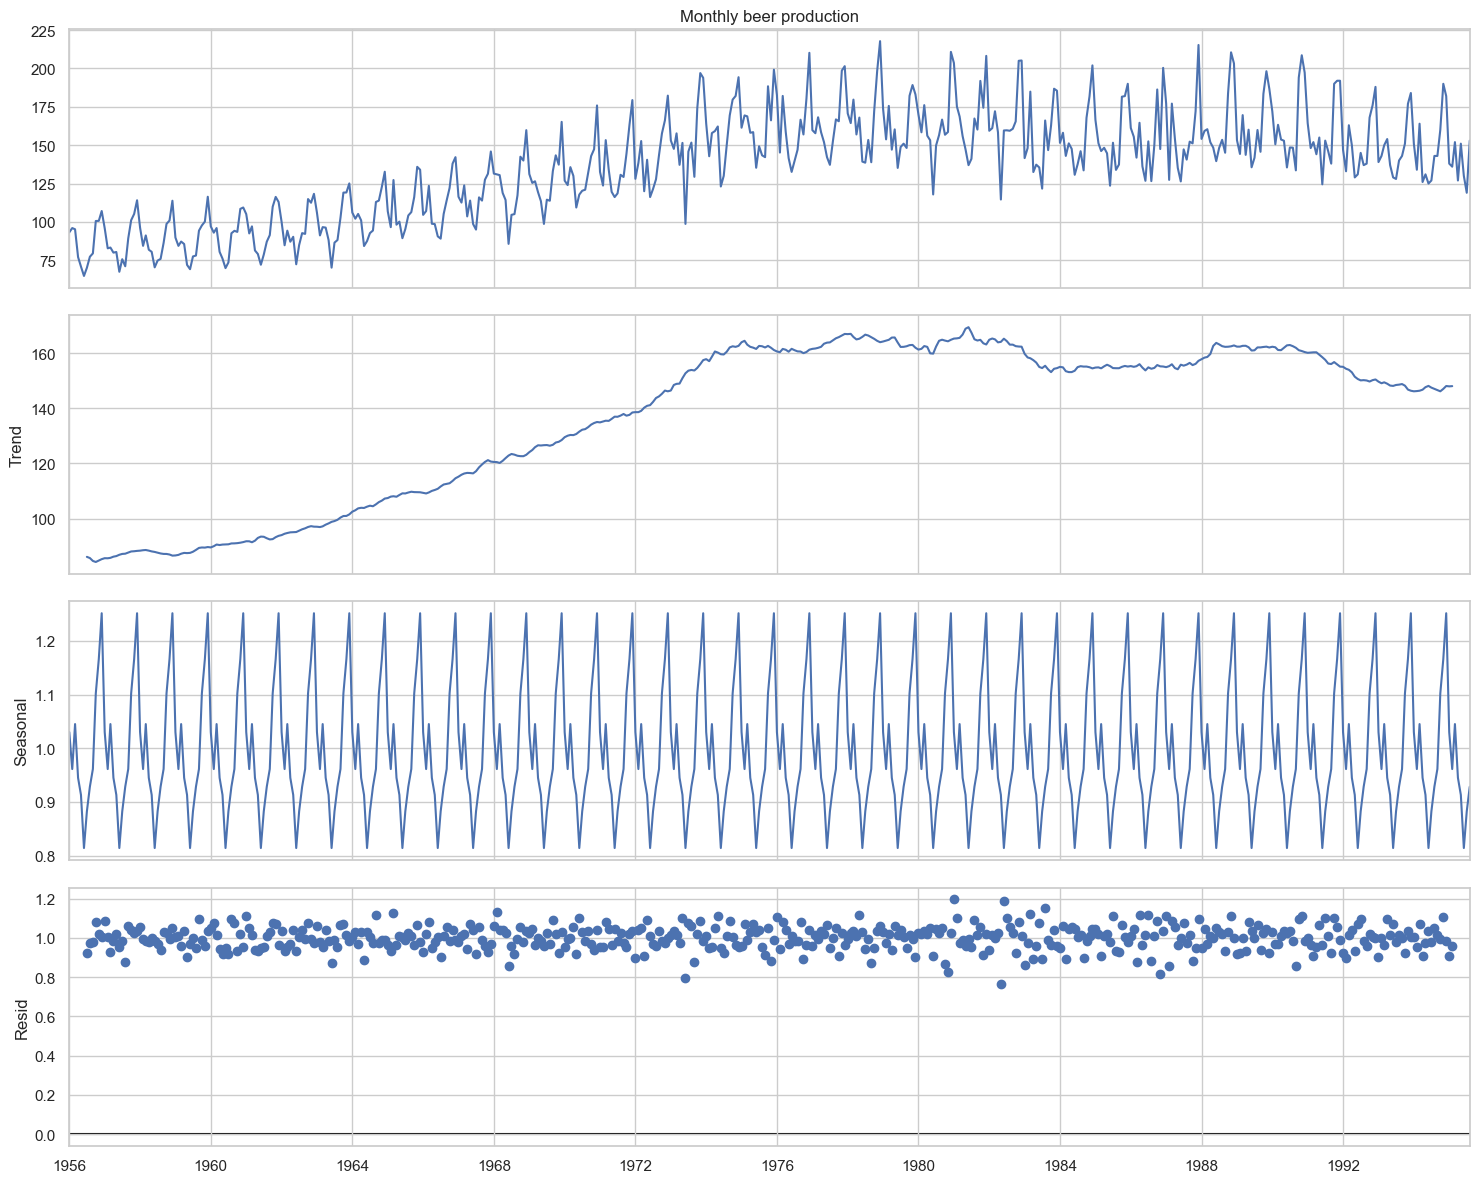

In [12]:
# Decomposing the time series data by using multiplicative method:

from statsmodels.tsa.seasonal import seasonal_decompose
decompose_additive = seasonal_decompose(df['Monthly beer production'], model='multiplicative',period=12)
decompose_additive.plot()
plt.show()

This confirms the presence of both trend and seasonality in the data

Next, The Durbin-Watson test is used to detect autocorrelation in time series data. Autocorrelation is the correlation between a time series and a lagged version of itself. In time series forecasting, it's crucial to identify and address autocorrelation because it can violate the assumption of independence in many forecasting models. The Durbin-Watson test provides a statistic that helps determine whether autocorrelation is present in the residuals of a time series model. If the test statistic falls significantly below or above a critical range, it indicates the presence of positive or negative autocorrelation, respectively. Detecting and addressing autocorrelation is essential to build accurate time series forecasting models.

In [11]:
# Checking the auto correlation of the data using Durbin Watson test

sm.stats.durbin_watson(df['Monthly beer production'])

0.019486494992529867

This indicates that there is autocorrelation in the data

The Augmented Dickey-Fuller (ADF) test is used to determine if a time series is stationary. In time series forecasting, stationarity is a crucial assumption because many forecasting methods work best with stationary data. The ADF test helps assess whether differencing the data (i.e., subtracting consecutive observations) is necessary to make it stationary. If the test suggests non-stationarity, differencing can be applied to make the data suitable for forecasting models.

In [12]:
# The time series data needs to be stationary before building a Time Series model
# This will be tested by using Augumented Dickey Fuller Test.

from statsmodels.tsa.stattools import adfuller

def adf_check(timeseries):
    result = adfuller(timeseries)
    print('Augumented Dickey Fuller Test to ensure if the data is stationary:')
    labels = ['ADF Stats Test', 'P Value', 'No. of lags', 'No. of observations']
    
    for i, j in zip(labels, result):
        print(i + '=' + str(j))
        
    if result[1] <= 0.05:
        print('The time series is stationary as there is strong evidence against the null hypothesis')
    else:
        print('The time series is non-stationary as there is weak evidence against null hypothesis')

In [13]:
adf_check(df['Monthly beer production'])

Augumented Dickey Fuller Test to ensure if the data is stationary:
ADF Stats Test=-2.2826614187875727
P Value=0.17762099829132655
No. of lags=17
No. of observations=458
The time series is non-stationary as there is weak evidence against null hypothesis


In [14]:
# Now to make the time series stationary, performing 1st order differentiation in order to remove trend from the data:

df['First_order_diff'] = df['Monthly beer production'] - df['Monthly beer production'].shift(1)

In [15]:
df.head()

,Monthly beer production,First_order_diff
Month,,
1956-01-01,93.2,NaN
1956-02-01,96.0,2.8
1956-03-01,95.2,-0.8
1956-04-01,77.1,-18.1
1956-05-01,70.9,-6.2


In [16]:
# Now checking if the data is stationary:

adf_check(df['First_order_diff'].dropna())

Augumented Dickey Fuller Test to ensure if the data is stationary:
ADF Stats Test=-4.980663743064851
P Value=2.423411785995415e-05
No. of lags=18
No. of observations=456
The time series is stationary as there is strong evidence against the null hypothesis


In [17]:
# The attempt was successful and that data is now free of trend, now removing seasonality from the data.
# As it is seen that the pattern is repeated and reaches the high at every end of the year applying a lag of 12.

df['First_order_seasonal_diff'] = df['Monthly beer production'] - df['Monthly beer production'].shift(12)

In [18]:
# Now after removing the seasonality from the data checking if it is stationary:

adf_check(df['First_order_seasonal_diff'].dropna())

Augumented Dickey Fuller Test to ensure if the data is stationary:
ADF Stats Test=-2.8967624777520076
P Value=0.04572577462359645
No. of lags=17
No. of observations=446
The time series is stationary as there is strong evidence against the null hypothesis


Now in order to fit SARIMAX model we need to know the optimum values of p, d, q (p-order of an auto regressive model, d-order of differencing need to be applied, q-order of moving average model) and P, D, Q (P-order of a seasonal auto regressive model, D-order of seasonal differencing need to be applied, Q-order of seasonal moving average model)

In [19]:
# To find the optimum values:

# For trend:
# p - ??
# d - 1
# q - ??

Auto-correlation (ACF) and partial auto-correlation (PACF) are two fundamental concepts in time series forecasting and analysis.

1. Auto-correlation (ACF):
Auto-correlation, often denoted as ACF, is a measure of the correlation between a time series and a lagged version of itself. In other words, it quantifies how each data point in a time series is related to its previous values at various lags. ACF is a fundamental tool for identifying the presence of seasonality and trend patterns in a time series. It helps in understanding how past observations influence the current observation.

ACF is calculated for various lags, and the resulting plot, called the ACF plot or correlogram, shows the correlation coefficients at different lags. If there is a significant spike in the ACF at a specific lag, it suggests a relationship between the current value and the value at that lag.

2. Partial Auto-correlation (PACF):
Partial auto-correlation, often denoted as PACF, is a measure of the correlation between a data point and a lagged version of itself, after accounting for the contributions of intermediate lags. In other words, PACF measures the direct relationship between a data point and a lag, removing the influence of the shorter lags in between. PACF helps in identifying the order of an autoregressive (AR) model, which is a common component in time series forecasting.

PACF is used to distinguish between genuine relationships with specific lags and indirect relationships caused by shorter lags. By examining the PACF plot, you can identify the number of lags to include in an AR model. Significant spikes in the PACF plot at specific lags indicate the order of the AR model.

In summary, ACF and PACF are tools for understanding the temporal relationships within a time series. ACF helps identify overall patterns, while PACF helps identify direct relationships between a data point and specific lags, aiding in model selection and forecasting in time series analysis.

In [21]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

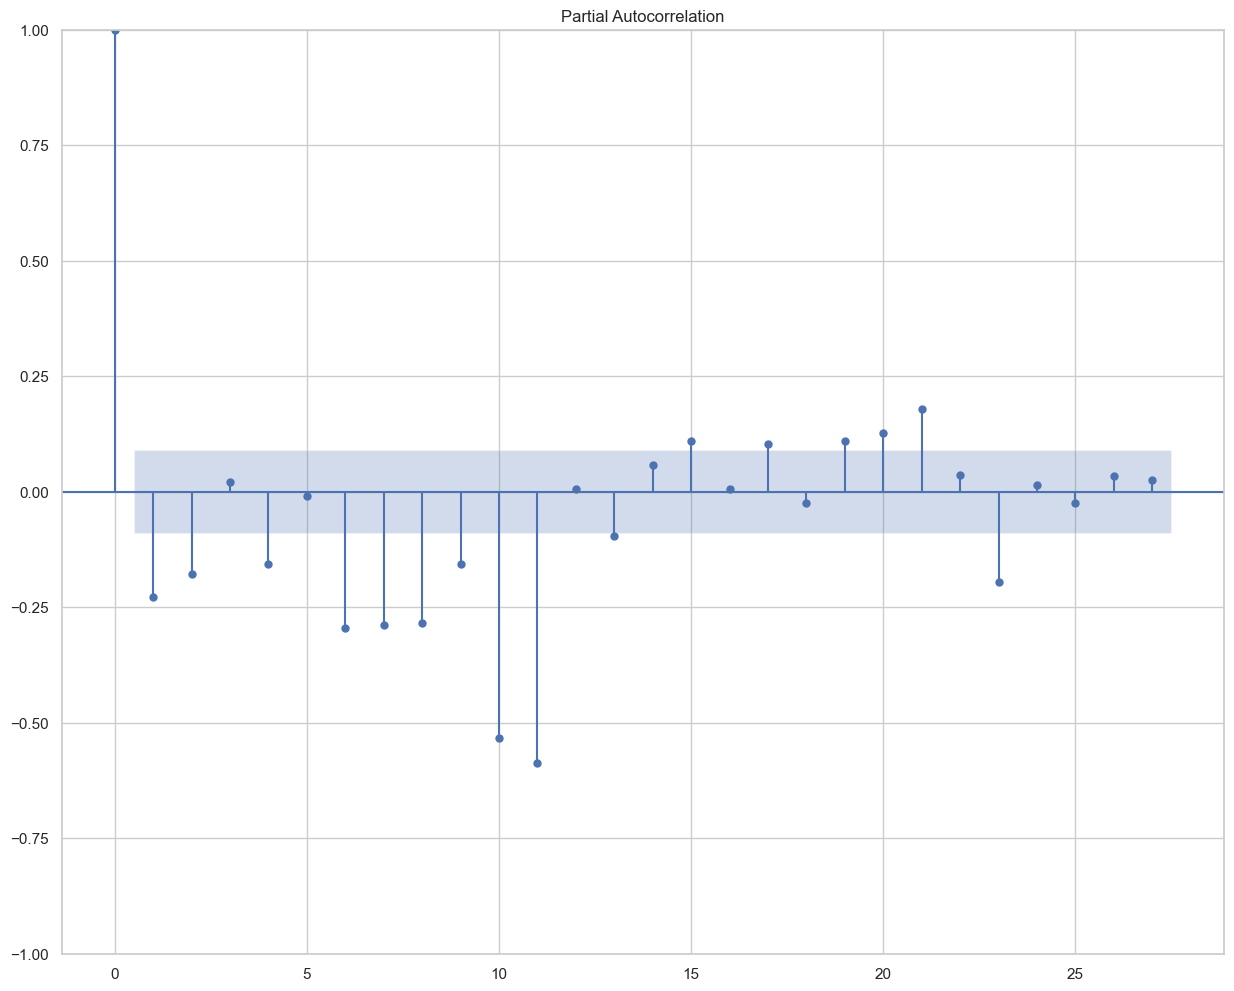

In [22]:
# Finding the value of p (pacf - Partial auto correlation plot is used to find the optimum value of p)

plot_pacf(df['First_order_diff'].dropna())
plt.show()

Consecutive values after the first line should be considered until the line converges into the range of -0.2 to +0.2, in this case the value of p is 2

In [23]:
# To find the optimum values:

# For trend:
# p - 2
# d - 1
# q - ??

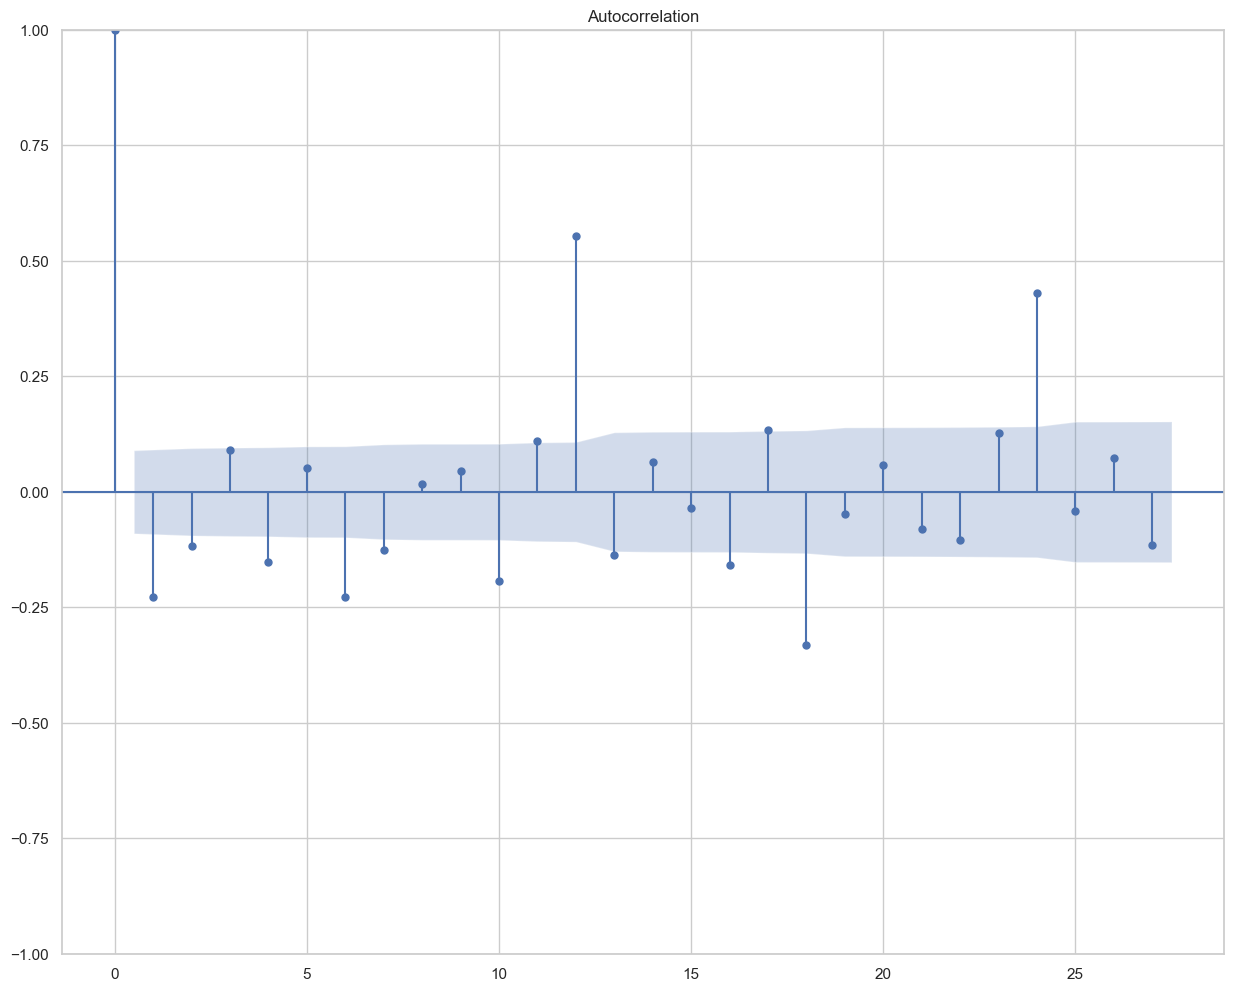

In [24]:
# Finding the value of q (Auto Correlation plot is used to find the optimal value of q)

plot_acf(df['First_order_diff'].dropna())
plt.show()

Consecutive values after the first line should be considered until the line converges into the range of -0.2 to +0.2, in this case the value of q is 4

In [25]:
# To find the optimum values:

# For trend:
# p - 2
# d - 1
# q - 4

In [26]:
# To find the optimum values:

# For seasonality:
# P - ??
# D - 1
# Q - ??

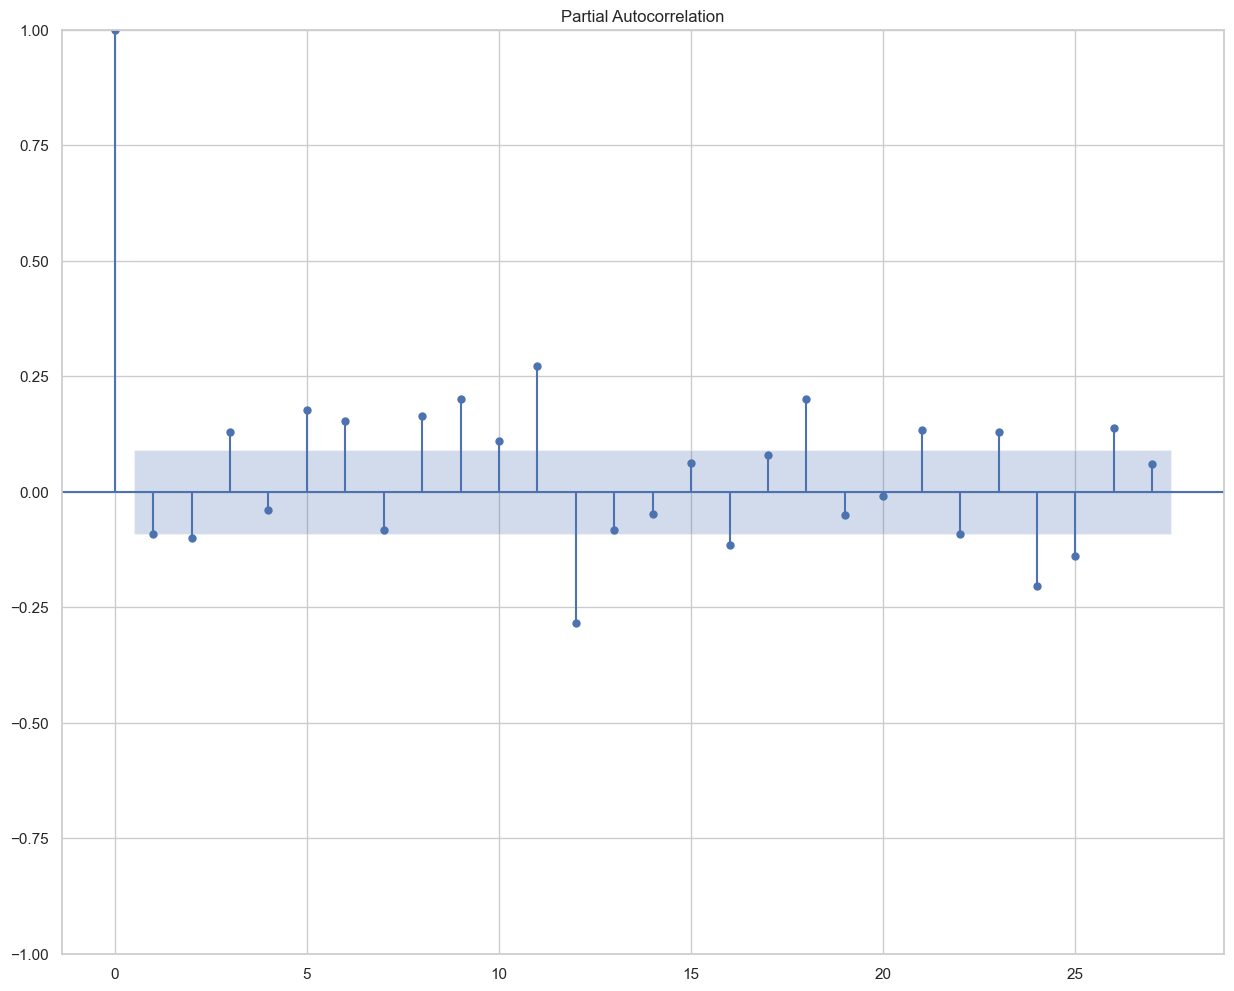

In [27]:
# Finding the value of P (pacf - Partial auto correlation plot is used to find the optimum value of P)

plot_pacf(df['First_order_seasonal_diff'].dropna())
plt.show()

In [28]:
# To find the optimum values:

# For seasonality:
# P - 3
# D - 1
# Q - ??

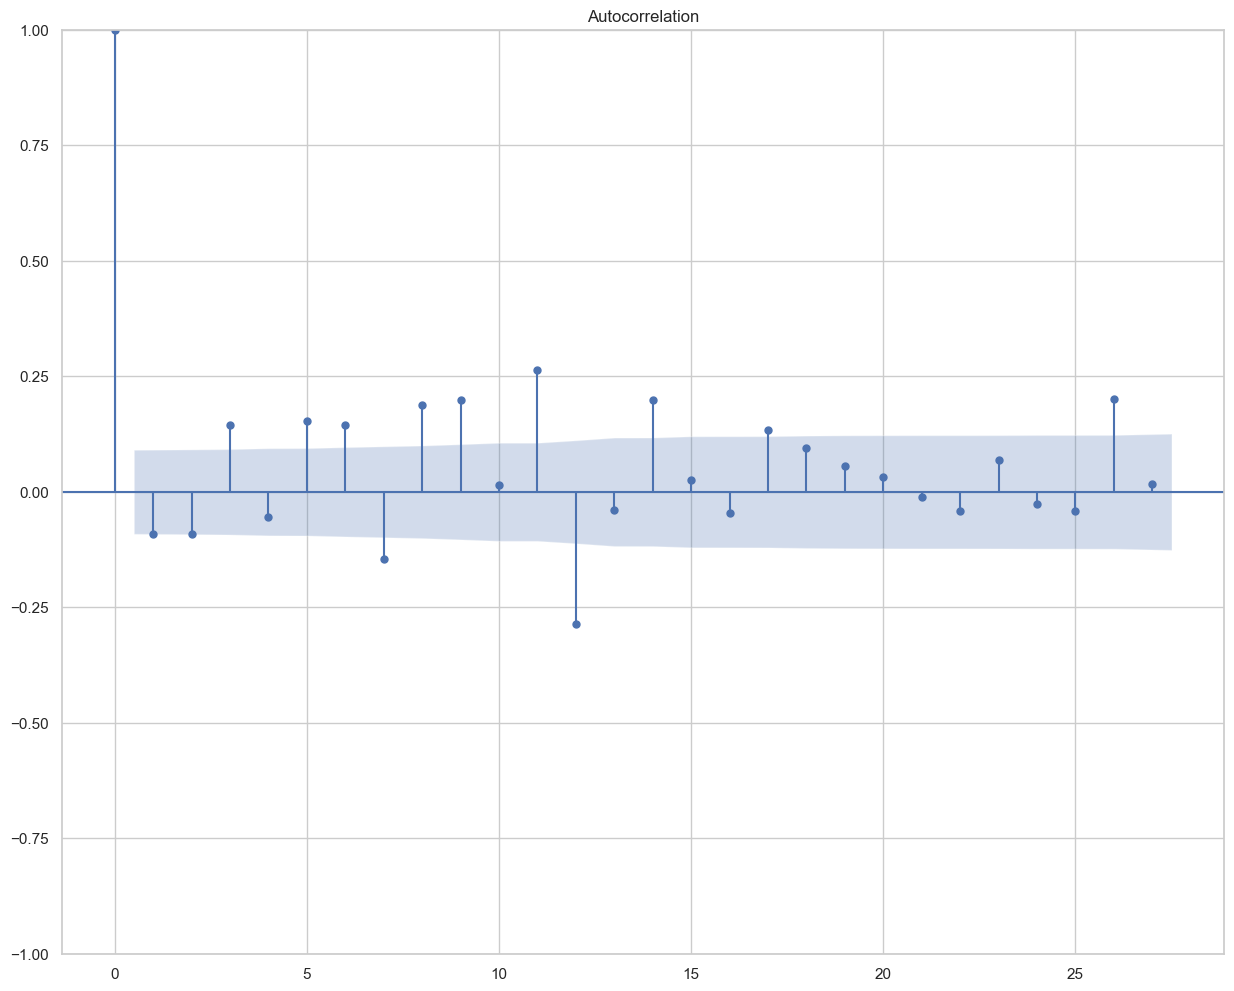

In [29]:
# Finding the value of Q (acf - Auto Correlation plot is used to find the optimal value of Q)

plot_acf(df['First_order_seasonal_diff'].dropna())
plt.show()

In [30]:
# To find the optimum values:

# For seasonality:
# P - 3
# D - 1
# Q - 3

In [31]:
# To find the optimum values:

# For trend:
# p - 2
# d - 1
# q - 4

# For seasonality:
# P - 3
# D - 1
# Q - 3


A SARIMAX (Seasonal Autoregressive Integrated Moving Average with Exogenous Variables) model is significant for time series forecasting when the data exhibits seasonality and may be influenced by external factors. It combines ARIMA (AutoRegressive Integrated Moving Average) modeling with seasonal components and the inclusion of exogenous variables. The key parameters include the order of differencing (d), autoregressive order (p), moving average order (q), seasonal differencing (D), seasonal autoregressive order (P), seasonal moving average order (Q), and the periodicity (s) of the seasonality.

SARIMAX is best used for forecasting time series data with clear seasonal patterns and when external factors, such as economic indicators or weather data, have an impact on the series. It is a versatile model that can handle complex time series data, making it valuable in various domains, including finance, economics, and demand forecasting.

In [36]:
# Now that the initial pdq values are found, fitting a time series model (SARIMAX):

model = sm.tsa.statespace.SARIMAX(df['Monthly beer production'], order=(0,1,5), seasonal_order=(3,1,3,12))
result = model.fit()
print(result.summary())

                                         SARIMAX Results                                          
Dep. Variable:                    Monthly beer production   No. Observations:                  476
Model:             SARIMAX(0, 1, 5)x(3, 1, [1, 2, 3], 12)   Log Likelihood               -1682.287
Date:                                    Sat, 14 Oct 2023   AIC                           3388.574
Time:                                            18:30:43   BIC                           3438.227
Sample:                                        01-01-1956   HQIC                          3408.121
                                             - 08-01-1995                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0103      0.039    -25.647      0

AIC (Akaike Information Criterion) in the SARIMAX results summary is a measure of the model's goodness of fit while penalizing for model complexity. Lower AIC values are better. The optimal values of AIC are the ones that correspond to the SARIMAX model with the best trade-off between goodness of fit and simplicity. AIC is affected by the model's parameters, including the orders of differencing (d, D), autoregressive (p, P), and moving average (q, Q) components, as well as the choice of seasonality. The model with the lowest AIC is typically preferred for forecasting.

BIC (Bayesian Information Criterion) in the SARIMAX results summary is another measure of the model's goodness of fit and complexity. Lower BIC values are better. The optimal values of BIC are the ones that correspond to the SARIMAX model with the best trade-off between goodness of fit and simplicity. BIC is affected by the model's parameters, including the orders of differencing (d, D), autoregressive (p, P), and moving average (q, Q) components, as well as the choice of seasonality. Like AIC, the model with the lowest BIC is generally preferred for forecasting.

In [34]:
# AIC 3409.336 at seasonal_order = (3,1,3,12)
# AIC 3427.911 at seasonal_order = (3,1,2,12)
# AIC 3402.379 at seasonal_order = (3,1,1,12)
# ARIMA(0, 1, 3)x(2, 1, 3, 12), AIC 3395.553

# Considering AIC 3388 at seasonal_order = (3,1,3,12) for visual forecast predictions

In [ ]:
# Choosing the best values of pdq and P,D,Q using:


# import itertools

# p = d = q = range(0,6)
# pdq = list(itertools.product(p, d, q))
# seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

# for param_trend in pdq:
#     for param_seasonal in seasonal_pdq:
#         try:
#             model = sm.tsa.statespace.SARIMAX(df['Monthly beer production'], order=param_trend,seasonal_order=param_seasonal)
#             result = model.fit()
#             print('ARIMA{}x{}, AIC {}'.format(param_trend, param_seasonal, result.aic))
#         except:
#             continue

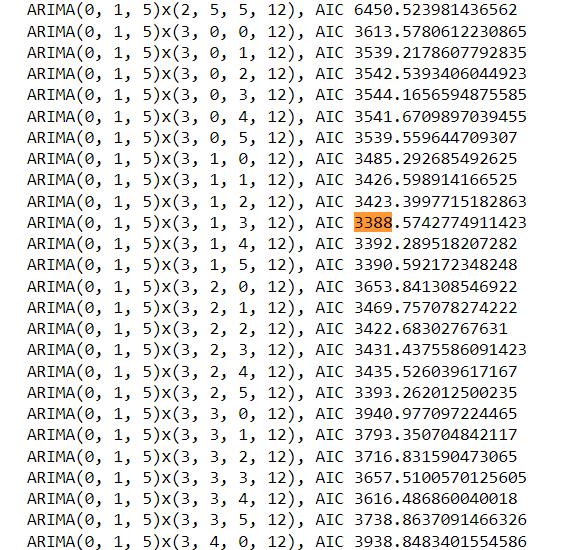

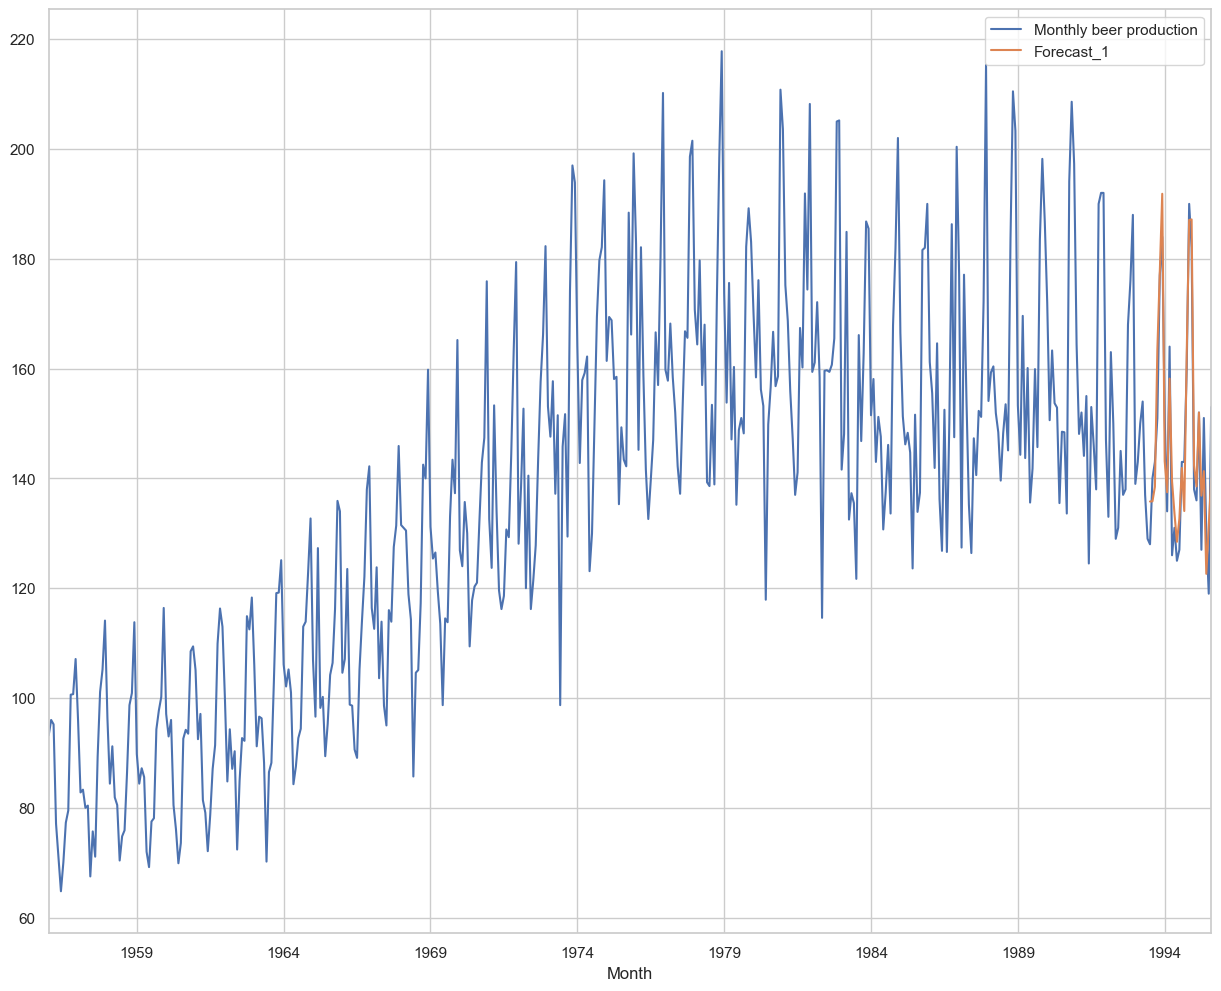

In [37]:
# Testing how the model is performing against the given data.

df['Forecast_1'] = result.predict(start = 450, end = 476, dynamic = True)
df[['Monthly beer production', 'Forecast_1']].plot()
plt.show()

This means to say that the model is understanding the pattern well and giving the right predictions and can be forecasted for future values in time

In [38]:
# Now predicting for future values in time from 1995-08

from pandas.tseries.offsets import DateOffset

In [39]:
# Predicting the monthly production of beer in megaliters for next 5 years i.e up to 1998-12

future_dates = [df.index[-1] + DateOffset(months = x) for x in range(1, 65)]

In [40]:
future_dates

[Timestamp('1995-09-01 00:00:00'),
 Timestamp('1995-10-01 00:00:00'),
 Timestamp('1995-11-01 00:00:00'),
 Timestamp('1995-12-01 00:00:00'),
 Timestamp('1996-01-01 00:00:00'),
 Timestamp('1996-02-01 00:00:00'),
 Timestamp('1996-03-01 00:00:00'),
 Timestamp('1996-04-01 00:00:00'),
 Timestamp('1996-05-01 00:00:00'),
 Timestamp('1996-06-01 00:00:00'),
 Timestamp('1996-07-01 00:00:00'),
 Timestamp('1996-08-01 00:00:00'),
 Timestamp('1996-09-01 00:00:00'),
 Timestamp('1996-10-01 00:00:00'),
 Timestamp('1996-11-01 00:00:00'),
 Timestamp('1996-12-01 00:00:00'),
 Timestamp('1997-01-01 00:00:00'),
 Timestamp('1997-02-01 00:00:00'),
 Timestamp('1997-03-01 00:00:00'),
 Timestamp('1997-04-01 00:00:00'),
 Timestamp('1997-05-01 00:00:00'),
 Timestamp('1997-06-01 00:00:00'),
 Timestamp('1997-07-01 00:00:00'),
 Timestamp('1997-08-01 00:00:00'),
 Timestamp('1997-09-01 00:00:00'),
 Timestamp('1997-10-01 00:00:00'),
 Timestamp('1997-11-01 00:00:00'),
 Timestamp('1997-12-01 00:00:00'),
 Timestamp('1998-01-

In [41]:
future_df = pd.DataFrame(index = future_dates, columns=df.columns)
future_df

,Monthly beer production,First_order_diff,First_order_seasonal_diff,Forecast_1
1995-09-01,NaN,NaN,NaN,NaN
1995-10-01,NaN,NaN,NaN,NaN
1995-11-01,NaN,NaN,NaN,NaN
1995-12-01,NaN,NaN,NaN,NaN
1996-01-01,NaN,NaN,NaN,NaN
1996-02-01,NaN,NaN,NaN,NaN
1996-03-01,NaN,NaN,NaN,NaN
1996-04-01,NaN,NaN,NaN,NaN
1996-05-01,NaN,NaN,NaN,NaN
1996-06-01,NaN,NaN,NaN,NaN


In [42]:
future_preds = pd.concat([df, future_df])

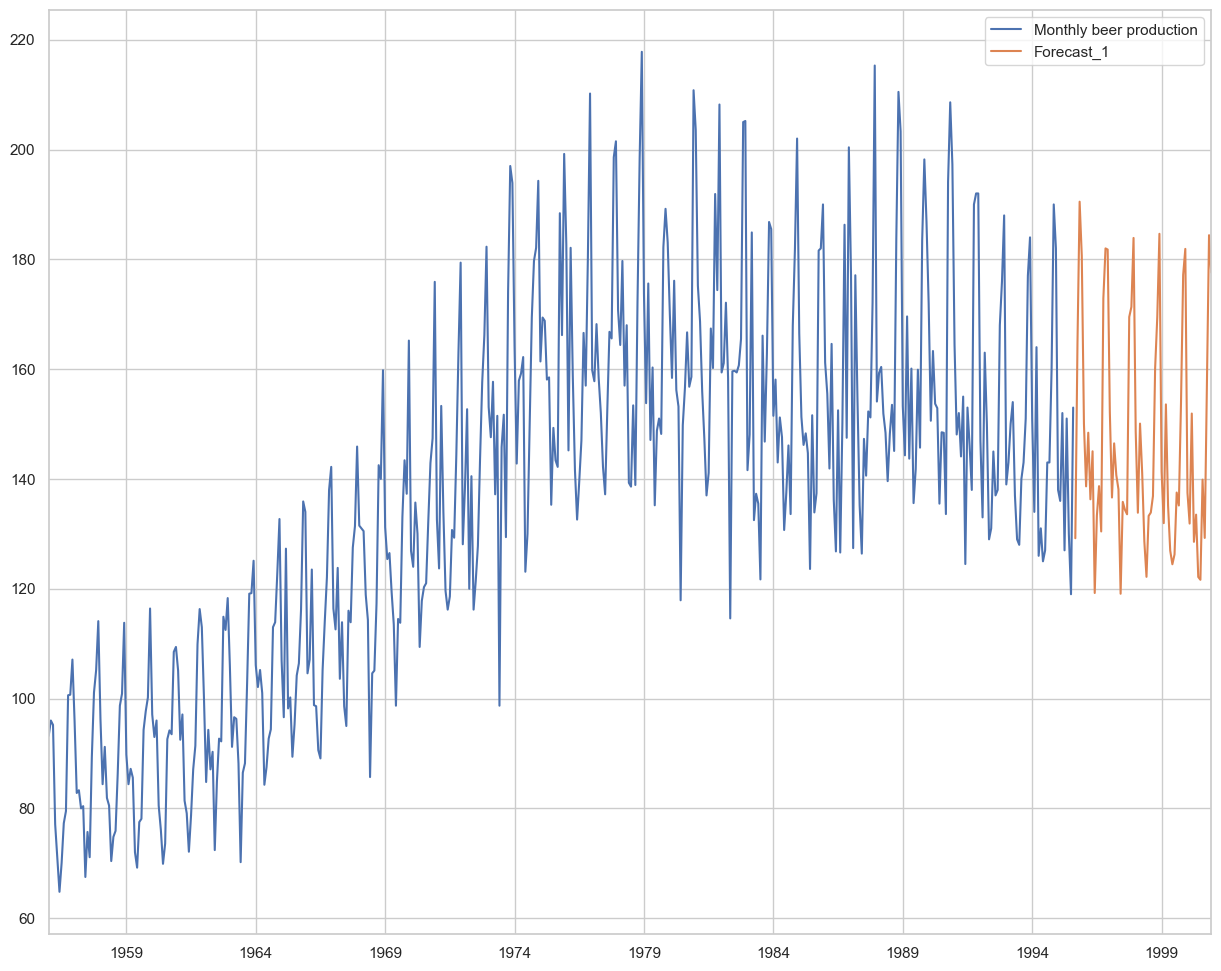

In [43]:
# Visualising the future forecast pattern.

future_preds['Forecast_1'] = result.predict(start = 476, end = 540, dynamic = True)
future_preds[['Monthly beer production', 'Forecast_1']].plot()
plt.show()

Looking at the visual, the model seems to be giving promising forecasts.

In [44]:
final_predictions = pd.DataFrame(future_preds['Forecast_1'].tail(64), index = future_dates)

In [45]:
# Below are the forecast values that can be given to the stake holders to make necessary implementations in the business,
# Keeping in mind the possible future scenarios.

final_predictions

,Forecast_1
1995-09-01,129.201730
1995-10-01,164.717849
1995-11-01,190.498579
1995-12-01,180.611712
1996-01-01,150.036754
1996-02-01,138.649104
1996-03-01,148.419637
1996-04-01,136.291654
1996-05-01,145.038382
1996-06-01,119.225425
